# STAT207 Final Project - Identifying and Valuing Residential Homes in Ames, Iowa.

Billy Frantzis

## 1. Introduction

Buying and selling homes can be milestone achievements for many families. However, spending hundreds of thousands of dollars on a home can be stressful and the selection process is not easy. Therefore, homeowners, realtors, and prospective buyers alike would want to explore a home sales dataset in order to develop strategies to correctly value properties and identify features of these properties they are interested in selling or purchasing.

I want to investigate sale price as a response variable in order to develop a strategy to value homes in Ames, Iowa. Additionally, I want to get an idea of how to identify features a property might have, as this could be useful for prospective buyers.
Therefore, I intend to answer the following questions in my report:

1. How does the relationship between the Sale Price of a house and its most recent Year Remodeled vary by its Overall Quality in my sample of Ames, Iowa homes between 2006-2010?

I am interested in answering this question because I would like to know how the sale prices of my sample of Ames, Iowa homes are impacted by their year remodeled, as I'm wondering if there is a correlation, since buyers may have a preference between newly updated and non-modern homes. Additionally, I want to know how the overall quality changes this relationship, if at all. 

2. Is there a significant difference in the mean sale price of all houses in Ames with and without a central air conditioning system?

I am intereseted in answering this question because I want to determine if a central air conditioning system plays a role in determining sale price of homes across the entire population of Ames, Iowa homes. The answer to this question could be used for sellers in determining whether to invest in a central air system and buyers in determining whether to pay a different price for a house based upon it's central air conditioning status.

3. Is there a linear relationship between the sale price of a house and the square footage, the number of bedrooms, the number of bathrooms, and the total number of rooms above ground in a house in the Ames sample? Does this relationship hold true for all Ames houses?

I am interested in answering this question because I want to determine whether variables related to the general size of the house--sq. footage, number of bedroom, number of bathrooms, and total number of above ground rooms--impact the sales price. This information can be used to determine a fair value to offer or sell a house for when provided with these variables to describe its general size.

4. Is there evidence of a linear relationship between the log-odds of a foundation being Cinderblock and the Year a house was built, its external quality, basement quality, and the basement's exposure? Does this relationship hold true in the population of all houses in Ames, Iowa?

I am interested in answering this question because I'd like to be able to predict whether a house has a cinderblock foundation, as this can determine the strength of a home and whether or not it could take on additions or changes. The answer to this question could be used by prospective homebuyers in Ames, Iowa, in order to predict the foundation of a home they're interested in. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from scipy.stats import norm, t
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('ames.csv')
df.head(n=6)

,Order,PID,MSSubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


In [4]:
df.shape

(2930, 82)

The dataset I am using has 2,930 observations and 82 variables.

The information included in my data are concrete facts about homes, including quantitative features such as sale price or lot area, and categorical features such as street type or neighborhood. Due to this, however, data is not included about aesthetics and interior design, which are unique to each person's judgement and not concrete. It is important to note that these features are key in creating a description of the house for a buyer or seller. Therefore, in a future dataset or analysis, I would like to add a 'Design Type' variable that categorizes the interior design of each home to a known style that it most closely resembles. 

## 2. Descriptive Analytics

How does the relationship between the Sale Price of a house and its most recent Year Remodeled vary by its Overall Quality in my sample of Ames, Iowa homes between 2006-2010?

Text(0.5, 1.0, 'Sale Price of Sample Ames homes vs. Year Sold and Overall Quality')

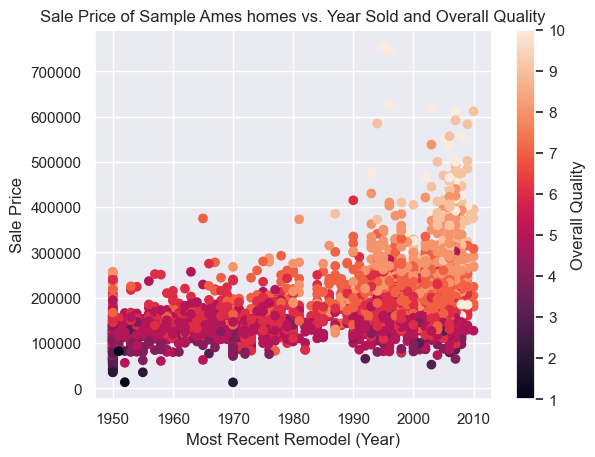

In [68]:
plt.scatter(data=df,x='Year_Remod_Add',y='SalePrice',c='Overall_Qual')
plt.xlabel('Most Recent Remodel (Year)')
plt.ylabel('Sale Price')
cbar=plt.colorbar()
cbar.set_label('Overall Quality')
plt.title('Sale Price of Sample Ames homes vs. Year Sold and Overall Quality')

In my scatterplot above, the relationship between the remodel year and sale price is shown through plotted points with overall quality shown as the shade of color.

The scatterplot shows a moderately strong, positive, linear relationship between the most recent year remodeled and the sale price of a house in my sample of Ames, Iowa homes. There are 2 outliers between 1960-1970 and several more outliers between 1990-2010. The only 'low' outlier was a home remodeled in 1970, while the rest were 'high' outliers. 

Additionally, their appeared to be a strong, positive relationship between Overall Quality of a home and its Sale Price in the dataset. This is demonstrated by the color shade lightening (from a dark purple to a beige) as the price, or y-axis value, increases. This relationship remains the same regardless of remodel year and is a clearly visible pattern, demonstrating its the high strength of the relationship. Therefore, Overall Quality could vary the relationship between Remodel Year and Sale Price by boosting the price regardless of the timing of the Remodel Year.

**Summary Statistics Analysis**

In [79]:
remod=df.groupby('Year_Remod_Add')['SalePrice']
remod.describe()

,count,mean,std,min,25%,50%,75%,max
Year_Remod_Add,,,,,,,,
1950,361.0,115397.343490,38011.786157,34900.0,89900.0,113000.0,137000.00,257076.0
1951,14.0,124742.857143,22378.276358,81500.0,106750.0,130500.0,138725.00,155000.0
1952,15.0,113466.200000,37727.744539,13100.0,113750.0,123500.0,133500.00,166000.0
1953,20.0,137880.000000,36841.375481,79900.0,112175.0,133000.0,153500.00,225000.0
1954,28.0,127803.250000,27914.342514,80400.0,110750.0,126250.0,141200.00,224000.0
...,...,...,...,...,...,...,...,...
2006,202.0,237547.747525,96747.313035,79000.0,170102.5,212949.5,292250.00,556581.0
2007,164.0,244114.500000,98787.212606,64500.0,174000.0,223500.0,295187.75,610000.0
2008,81.0,265686.222222,97229.769407,97000.0,207500.0,250580.0,332000.00,555000.0


In [81]:
overall_qual=df.groupby('Overall_Qual')['SalePrice']
overall_qual.describe()

,count,mean,std,min,25%,50%,75%,max
Overall_Qual,,,,,,,,
1,4.0,48725.000000,29341.935292,13100.0,32750.00,50150.0,66125.0,81500.0
2,13.0,52325.307692,17562.955704,12789.0,45000.00,57625.0,60000.0,82000.0
3,40.0,83185.975000,23569.801683,37900.0,64875.00,81200.0,95475.0,139600.0
4,226.0,106485.097345,29224.943495,34900.0,85500.00,105000.0,124275.0,256000.0
5,825.0,134752.516364,27690.596654,55993.0,119600.00,133000.0,147983.0,301600.0
6,732.0,162130.318306,37201.296411,76000.0,138000.00,159500.0,182000.0,415000.0
7,602.0,205025.760797,43166.268562,82500.0,176421.25,200000.0,229600.0,383970.0
8,350.0,270913.594286,61326.207415,122000.0,230000.00,264530.5,305975.0,538000.0
9,107.0,368336.766355,79201.265422,150000.0,318030.50,360000.0,405374.5,611657.0


As shown in the summary tables for both Year Remodeled & Sale Price and Overall Quality & Sale Price, the values for almost all summary statistics increased as the either years were added or overall quality was higher. With the center values mean and median increasing at almost every step, it is clear that higher prices are separately associated with higher overall quality and a more recent remodel.

In [83]:
IQR_1950=137000-89900
IQR_2010=376162-204500
IQR_diff=IQR_2010-IQR_1950
print('1950 IQR:',IQR_1950,',','IQR 2010:',IQR_2010,',','IQR Diff:',IQR_diff)

1950 IQR: 47100 , IQR 2010: 171662 , IQR Diff: 124562


In [85]:
IQR_Qual1=66125-32750
IQR_Qual10=540112-385625
IQR_diff=IQR_Qual10-IQR_Qual1
print('IQR at Overall Quality rating of 1:',IQR_Qual1,',','IQR at Overall Quality rating of 10:',IQR_Qual10,',','IQR Diff:',IQR_diff)

IQR at Overall Quality rating of 1: 33375 , IQR at Overall Quality rating of 10: 154487 , IQR Diff: 121112


Along with the higher prices came higher variability in prices for both variables. For the Year Remodeled, the difference in IQR was 124,562 between 1950-2010. For the Overall Quality rating, the difference in IQR was 121,112 between the lowest rating, 1, and the highest rating, 10. This demonstrates that a larger spread in prices is related to an increase in either the Year Remodeled or Overall Quality rating.

**What About Both Variables Together?**

In [88]:
both_var=df.groupby(['Year_Remod_Add','Overall_Qual'])['SalePrice']
both_var.describe()

count           mean            std       min  \
Year_Remod_Add Overall_Qual                                                  
1950           1               2.0   50150.000000   15344.217152   39300.0   
               2              11.0   57494.545455   12426.873439   35311.0   
               3              24.0   74586.000000   18127.063411   37900.0   
               4              71.0   93883.563380   25784.176016   34900.0   
               5             133.0  115871.263158   26278.408685   62500.0   
...                            ...            ...            ...       ...   
2009           10              2.0  293355.500000  154864.163254  183850.0   
2010           5               1.0  127000.000000            NaN  127000.0   
               7               5.0  220662.200000   51744.338620  179781.0   
               8               3.0  276119.000000   12860.638670  267916.0   
               9               4.0  444360.750000  111877.240490  376162.0   

                                   25%       50%        75%       max  
Year_Remod_Add Overall_Qual                                            
1950           1              44725.00   50150.0   55575.00   61000.0  
               2              50750.00   59000.0   61950.00   82000.0  
               3              64000.00   73750.0   88375.00  107400.0  
               4              80000.00   90000.0  108250.00  149500.0  
               5              98500.00  115000.0  132500.00  205000.0  
...                                ...       ...        ...       ...  
2009           10            238602.75  293355.5  348108.25  402861.0  
2010           5             127000.00  127000.0  127000.00  127000.0  
               7             187000.00  204500.0  224000.00  308030.0  
               8             268708.00  269500.0  280220.50  290941.0  
               9             389864.50  394812.0  449308.25  611657.0  

[299 rows x 8 columns]

Similarly to what the scatterplot demonstrated, the summary statistics table shows a positive relationship between median & mean Sale Price of a home and its Overall Quality rating, regardless of the year in which it was remodeled. Therefore, it can inferred that the Overall Quality impacts the relationship between Year Remodeled and Sale Price of a home because of its independent positive relationship with Sale Price. However, it is important to note that the Year Remodeled also has a positive relationship with mean & median Sale Price as well, which creates an even larger jump in Sale Price when the Overall Quality rating increases.

## 3. Inference

Is there a significant difference in the mean sale price of all Ames, Iowa homes with and without a central air conditioning system?

**Parameters:** µ1= Mean sales price for all Ames homes with central air conditioning | µ2= Mean sales price for all Ames homes that do not have central air conditioning

**Null Hypothesis:** H0:µ1-µ2=0 | **Alternative Hypothesis:** H1: µ1-µ2≠0

In [5]:
has_ac=df[df['Central_Air']=='Y']
no_ac=df[df['Central_Air']=='N']
print('n1=',len(has_ac),'|','n2=',len(no_ac))

n1= 2734 | n2= 196


**Central Limit Theorem Conditions**
1. The sample of homes with central air conditioning was randomly sampled
2. The sample of homes without central air conditioning was randomly sampled
3. n1=2734>10% of all Ames homes with central air conditioning
4. n2=196<10% of all Ames homes without central air conditioning
5. n1=2734>30
6. n2=196>30

Because n1=2734>10% of all Ames homes with central air conditioning, the independence condition of the Central Limit Theorem is not met. Therefore, my results may not be valid. However, we will still proceed with the hypothesis test.

In [6]:
point_estimate=has_ac['SalePrice'].mean()-no_ac['SalePrice'].mean()

The point estimate represents the sample mean difference, which will be used to calculate the test statistic needed for my hypothesis test.

In [7]:
standard_error=np.sqrt((has_ac['SalePrice'].std()**2)/2734+(no_ac['SalePrice'].std()**2)/196)

In [8]:
test_stat=(point_estimate-0)/standard_error

I am using 0 as my population mean in the t-score formula because my null hypothesis is that there is no population mean difference. 

In [9]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=196-1))

In [10]:
print('Mean Difference=',point_estimate,'|','Standard Error=',standard_error,'|','Test Stat (t-score)=',test_stat,'|','p-value:',pvalue)

Mean Difference= 84562.3082647836 | Standard Error= 3082.478669067721 | Test Stat (t-score)= 27.433217661278743 | p-value: 0.0


Based on my hypothesis test, I would reject the null hypothesis because my p-value of 0.0 is less than my significance level of 0.05. Therefore, there is sufficient evidence to suggest there is a significant difference in the mean sales prices of Ames homes with and without central air conditioning. However, it is important to note that this conclusion may not be valid as not all of my central limit theorem conditions are met.

## 4. Linear Regression

Is there a linear relationship between the sale price of a house and the 1st floor square footage, the number of bedrooms above ground, the number of full bathrooms, and the total number of rooms above ground in a house in the Ames dataset? Does this relationship hold true in the population of all houses sold in Ames, Iowa?

In [11]:
model1=smf.ols('SalePrice ~ X1st_Flr_SF+Bedroom_AbvGr+Full_Bath+TotRms_AbvGrd',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     887.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:06   Log-Likelihood:                -36068.
No. Observations:                2930   AIC:                         7.215e+04
Df Residuals:                    2925   BIC:                         7.218e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.841e+04   4640.059     -6.124      0.000   -3.75e+04   -1.93e+04
X1st_Flr_SF      82.2409      2.896     28.394      0.000      76.562      87.920
Bedroom_AbvGr -2.251e+04   1667.751    -13.497      0.000   -2.58e+04   -1.92e+04
Full_Bath      4.369e+04   2167.657     20.155      0.000    3.94e+04    4.79e+04
TotRms_AbvGrd  1.702e+04    994.804     17.107      0.000    1.51e+04     1.9e+04
==============================================================================
Omnibus:                      458.392   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7495.713
Skew:                           0.131   Prob(JB):                         0.00
Kurtosis:                      10.831   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Sale Price Regression Equation:**
SalePrice_hat=-2.841e+04 + 82.2409*X1st_Flr_SF* - 2.251e+04*Bedroom_AbvGr* + 4.369e+04*Full_Bath* + 1.702e+04*TotRms_AbvGrd*

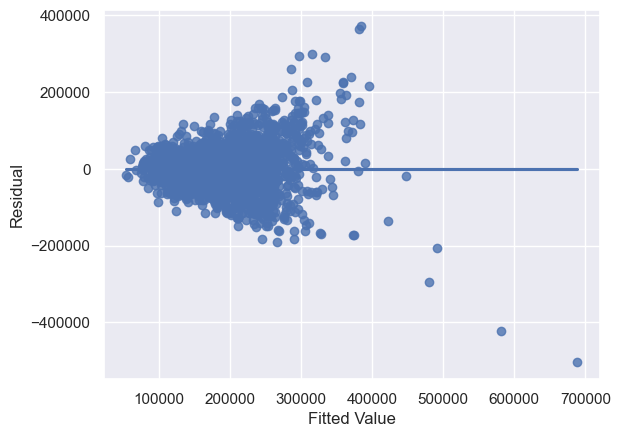

In [12]:
sns.regplot(x=model1.fittedvalues, y=model1.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Linearity Condition:** Because the distribution of points in the plot are not roughly evenly distributed as we move from left to right, the linearity condition is not met.

**Constant Variability of Residuals Condition:** Because the y-axis spread of points in the plot increases as we move from left to right, this condition is not met.

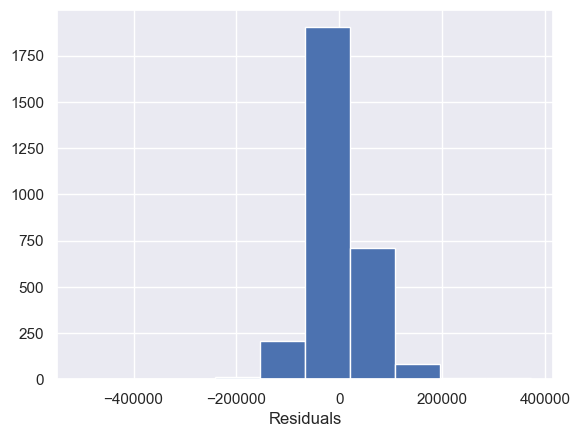

In [13]:
plt.hist(model1.resid)
plt.xlabel('Residuals')
plt.show()

**Normality of Residuals (with Mean of 0) Condition:** Although the histogram of residuals is unimodal and looks to have a mean of about 0, the residuals do not follow a bell curve shape, so this condition is not met.

In [14]:
n=len(df)
print('n=',n)

n= 2930


**Independence of Residuals Condition:** The data is randomly sampled and n=2930<10% of all Ames, Iowa homes sold. Therefore, the condition for independence may not be violated in this particular way. However, it may still be the case that these residuals are not independent.

In [15]:
df[['X1st_Flr_SF','Bedroom_AbvGr','Full_Bath','TotRms_AbvGrd']].corr()

,X1st_Flr_SF,Bedroom_AbvGr,Full_Bath,TotRms_AbvGrd
X1st_Flr_SF,1.000000,0.106648,0.371584,0.390162
Bedroom_AbvGr,0.106648,1.000000,0.359489,0.672647
Full_Bath,0.371584,0.359489,1.000000,0.528599
TotRms_AbvGrd,0.390162,0.672647,0.528599,1.000000


**No Multicollinearity Condition:** There is a pretty strong linear relationship between the explanatory variables Bedrooms Above Ground and Total Rooms Above Ground. Thus, the multicollinearity condition is violated.

In [16]:
model_no_bed=smf.ols('SalePrice ~ X1st_Flr_SF+Full_Bath+TotRms_AbvGrd',data=df).fit()
model_no_bed.rsquared

0.5201353049321964

In [17]:
model_no_tot=smf.ols('SalePrice ~ X1st_Flr_SF+Bedroom_AbvGr+Full_Bath',data=df).fit()
model_no_tot.rsquared

0.503069021036386

Since the r-squared in the model without the Bedrooms Above Ground variable is higher, I am not going to include that variable in my re-fitted model. This is because the model without Bedrooms Above Ground can explain more variability of the Sale Price.

In [18]:
model_no_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1057.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:07   Log-Likelihood:                -36156.
No. Observations:                2930   AIC:                         7.232e+04
Df Residuals:                    2926   BIC:                         7.234e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.561e+04   4597.708     -9.921      0.000   -5.46e+04   -3.66e+04
X1st_Flr_SF      91.4399      2.901     31.521      0.000      85.752      97.128
Full_Bath      4.201e+04   2230.069     18.838      0.000    3.76e+04    4.64e+04
TotRms_AbvGrd  8469.1324    790.447     10.714      0.000    6919.244       1e+04
==============================================================================
Omnibus:                      455.399   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5147.379
Skew:                           0.358   Prob(JB):                         0.00
Kurtosis:                       9.454   Cond. No.                     5.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

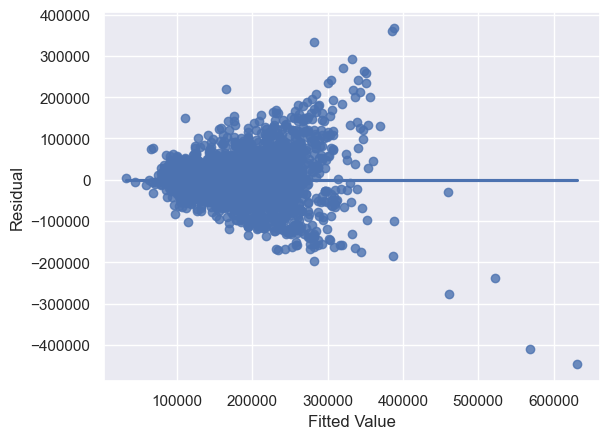

In [19]:
sns.regplot(x=model_no_bed.fittedvalues, y=model_no_bed.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**Linearity Condition:** Because the distribution of points in the plot are roughly evenly distributed as we move from left to right, the linearity condition is met.

**Constant Variability of Residuals Condition:** Because the y-axis spread of points in the plot increases as we move from left to right, this condition is not met.

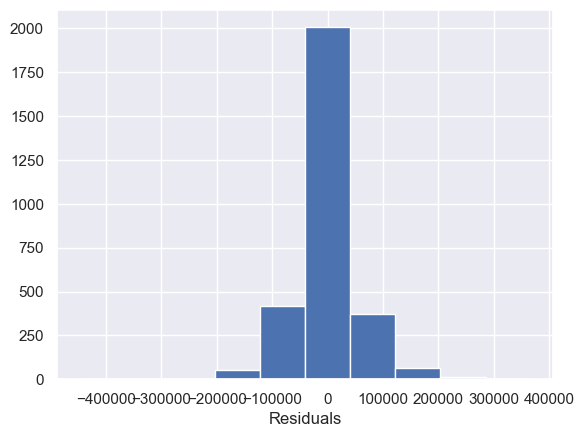

In [20]:
plt.hist(model_no_bed.resid)
plt.xlabel('Residuals')
plt.show()

**Normality of Residuals (with Mean of 0) Condition:** Because the histogram appears to be normally distributed with a mean of about 0, the assumption that the residuals are normally distributed is met.

**Independence of Residuals Condition:** Since the sample size did not change, my explanation will remain the same: the data is randomly sampled and n=2930<10% of all Ames, Iowa homes sold. Therefore, the condition for independence may not be violated in this particular way. However, it may still be the case that these residuals are not independent.

In [21]:
df[['X1st_Flr_SF','Full_Bath','TotRms_AbvGrd']].corr()

,X1st_Flr_SF,Full_Bath,TotRms_AbvGrd
X1st_Flr_SF,1.000000,0.371584,0.390162
Full_Bath,0.371584,1.000000,0.528599
TotRms_AbvGrd,0.390162,0.528599,1.000000


**No Multicollinearity Condition:** There is not a strong correlation between any of the 3 remaining explanatory variables. Thus, the multicollinearity condition is met.

**Variability in Sale Price:** 52.0% of the variability in Sale Price in my sample of Ames homes can be explained our model expalanatory variables: 1st Floor Square Footage, Number of Full Bathrooms, and Total Number of Rooms above Ground. This percentage is moderately high, meaning the model is a moderately strong fit to the data.

**Non-Zero Slopes:** For each of the 3 slopes in our model, the p-value calculated in the summary table is used to test a null hypothesis that the slope is equal to 0 and an alternative hypothesis that the slope is non-zero, and thus has a linear relationship with Sale Price. Since the p-value of all 3 slopes was 0.000, which is less than our significance level of 0.05, there is sufficient evidence to suggest that all 3 slopes (1st Floor Square Footage, Number of Full Bathrooms, and Total Rooms Above Ground) are non-zero.   

**Theoretical Sale Price Prediction:** To demonstrate my re-fitted model, I'm going to pretend that I am a homeowner looking to sell my house in Ames for a fair price. My home has 1250 square feet on the 1st floor, 2 full bathrooms, and 7 total rooms above ground.

In [22]:
model_no_bed.predict (exog=dict(X1st_Flr_SF=1250,Full_Bath=2,TotRms_AbvGrd=7))

0    211992.597734
dtype: float64

Using my re-fitted model, I can determine that a fair sales price for my home in Ames would be $211,922.60.

Based on my linear regression analysis, I found that there is a linear relationship between the sale price of a house and the 1st floor square footage, the number of full bathrooms, and the total number of rooms above ground for houses in Ames, Iowa. This can be supported by the R-squared value, .520, which means that 52% of variation in sale price can be explained by 1st floor square footage, number of full bathrooms, and total number of rooms above ground. Additionally, since there was sufficient evidence to suggest that all 3 slopes were non-zero for the population, it is likely that the relationship will hold true for all houses sold in Ames, Iowa, not just those from the sample.

## 5. Logistic Regression

Is there evidence of a linear relationship between the log-odds of a foundation being Cinderblock and the Year a house was built, its external quality, basement quality, and the basement's exposure? Does this relationship hold true in the population of all houses in Ames, Iowa?

In [23]:
df['Foundation_CBlock'] = df['Foundation'].map({'CBlock': 1, 'BrkTil': 0, 'PConc': 0, 'Slab': 0, 'Stone': 0, 'Wood': 0})
df.head()

,Order,PID,MSSubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Foundation_CBlock
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,1
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,1
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,1
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,0


The 'Foundation_CBlock' variable I added to the dataframe records a 1 if the foundation type is 'CBlock'--short for cinderblock--or 0 if the foundation type is not cinderblock.

In [24]:
df_train, df_test = train_test_split(df,test_size=0.25,random_state=123)

In [25]:
current_mod=smf.logit('Foundation_CBlock ~ Year_Built+Exter_Qual+Bsmt_Qual+Bsmt_Exposure', data=df_train).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

         Current function value: 0.465543
         Iterations: 35
ITERATION 1: BIC of the Current Model 2077.9912967342125


C:\Users\bfran\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
no_yb_mod=smf.logit('Foundation_CBlock ~ Exter_Qual+Bsmt_Qual+Bsmt_Exposure', data=df_train).fit()
print('BIC of Test Model that Deletes YEAR BUILT from the Current Model',no_yb_mod.bic)

         Current function value: 0.481352
         Iterations: 35


C:\Users\bfran\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


BIC of Test Model that Deletes YEAR BUILT from the Current Model 2137.763737925579


In [27]:
no_eq_mod=smf.logit('Foundation_CBlock ~ Year_Built+Bsmt_Qual+Bsmt_Exposure', data=df_train).fit()
print('BIC of Test Model that Deletes EXTERNAL QUALITY from the Current Model',no_eq_mod.bic)

         Current function value: 0.521778
         Iterations: 35
BIC of Test Model that Deletes EXTERNAL QUALITY from the Current Model 2294.892556770859


C:\Users\bfran\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
no_bq_mod=smf.logit('Foundation_CBlock ~ Year_Built+Exter_Qual+Bsmt_Exposure', data=df_train).fit()
print('BIC of Test Model that Deletes BASEMENT QUALITY from the Current Model',no_bq_mod.bic)

Optimization terminated successfully.
         Current function value: 0.520219
         Iterations 7
BIC of Test Model that Deletes BASEMENT QUALITY from the Current Model 2280.57863925028


In [29]:
no_be_mod=smf.logit('Foundation_CBlock ~ Year_Built+Exter_Qual+Bsmt_Qual', data=df_train).fit()
print('BIC of Test Model that Deletes BASEMENT EXPOSURE from the Current Model',no_be_mod.bic)

         Current function value: 0.475837
         Iterations: 35
BIC of Test Model that Deletes BASEMENT EXPOSURE from the Current Model 2100.8212091163155


C:\Users\bfran\miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Because there were no test models that had a lower than the BIC score of the current model (2077.99), we must stop the algorithm and return to the current model with explanatory variables Year Built, External Quality, Basement Quality, and Basement Exposure as our final model.

**Final Logistic Regression Model Summary and Equation:**

In [30]:
current_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Foundation_CBlock   No. Observations:                 2133
Model:                          Logit   Df Residuals:                     2121
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.3146
Time:                        19:31:09   Log-Likelihood:                -993.00
converged:                      False   LL-Null:                       -1448.8
Covariance Type:            nonrobust   LLR p-value:                1.990e-188
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -50.1702      5.907     -8.493      0.000     -61.749     -38.592
Exter_Qual[T.Fa]        2.7253      0.822      3.316      0.001       1.115       4.336
Exter_Qual[T.Gd]        0.1354      0.687      0.197      0.844      -1.212       1.482
Exter_Qual[T.TA]        2.5022      0.690      3.628      0.000       1.151       3.854
Bsmt_Qual[T.Fa]         3.3730      0.629      5.366      0.000       2.141       4.605
Bsmt_Qual[T.Gd]         2.2536      0.521      4.326      0.000       1.233       3.275
Bsmt_Qual[T.Po]       -12.6337   3947.214     -0.003      0.997   -7749.031    7723.764
Bsmt_Qual[T.TA]         4.4465      0.548      8.114      0.000       3.372       5.521
Bsmt_Exposure[T.Gd]     0.6256      0.252      2.484      0.013       0.132       1.119
Bsmt_Exposure[T.Mn]    -0.5967      0.252     -2.366      0.018      -1.091      -0.102
Bsmt_Exposure[T.No]    -0.7324      0.182     -4.033      0.000      -1.088      -0.377
Year_Built              0.0230      0.003      7.870      0.000       0.017       0.029
=======================================================================================
"""

logit(P(Foundation_CBlock=1)) = -50.1702 + 2.7253*(Exter_Qual[T.Fa]) + 0.1354*(Exter_Qual[T.Gd]) + 2.5022*(Exter_Qual[T.TA]) + 3.3730*(Bsmt_Qual[T.Fa]) + 2.2536*(Bsmt_Qual[T.Gd]) - 12.6337*(Bsmt_Qual[T.Po]) + 4.4465*(Bsmt_Qual[T.TA]) + 0.6256*(Bsmt_Exposure[T.Gd]) - 0.5967*(Bsmt_Exposure[T.Mn]) - 0.7324*(Bsmt_Exposure[T.No]) + 0.0230*(Year_Built)

**Non-Zero Slopes:** For each of the slopes in our model, the p-value calculated in the summary table is used to test a null hypothesis that the slope is equal to 0 and an alternative hypothesis that the slope is non-zero, and thus has a linear relationship with the log-odds of the foundation type being Cinderblock. Since the p-value of all slopes except *Good External Quality and Poor Basement Quality* were less than our significance level of 0.05, there is sufficient evidence to suggest that the slopes *Fair External Quality, Typical External Quality, Fair Basement Quality, Good Basement Quality, Typical Basement Quality, Good Basement Exposure, Minimum Basement Exposure, No Basement Exposure, and Year Built*  are non-zero.

In [31]:
Foundation_CBlock_test=current_mod.predict(exog=df_test)
Foundation_CBlock_test.head(10)

655     0.278443
645     0.734680
80      0.375817
1927    0.303773
2030    0.614533
2134    0.498764
2663    0.495832
1356    0.529733
2199    0.558819
2834    0.273845
dtype: float64

In [32]:
df_test['Foundation_CBlock_test']=Foundation_CBlock_test
df_test.head()

,Order,PID,MSSubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,Foundation_CBlock,Foundation_CBlock_test
655,656,535375050,50,RL,60.0,10410,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,8,2009,WD,Normal,135000,1,0.278443
645,646,535325290,20,RL,60.0,10434,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,11,2009,WD,Normal,115000,1,0.734680
80,81,531453010,20,RL,81.0,9672,Pave,NaN,Reg,Lvl,...,GdPrv,NaN,0,5,2010,WD,Normal,152000,0,0.375817
1927,1928,535181030,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,...,NaN,NaN,0,3,2007,WD,Normal,163500,1,0.303773
2030,2031,903450060,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,6,2007,WD,Normal,169500,0,0.614533


The *Foundation_CBlock_test* variable provides the model's predicted value for whether or not the foundation type is cinderblock.

In [33]:
df_test['Foundation_CBlock_test'].isna().value_counts()

False    714
True      19
Name: Foundation_CBlock_test, dtype: int64

In [34]:
df_test['Foundation_CBlock'].isna().value_counts()

False    733
Name: Foundation_CBlock, dtype: int64

In [35]:
df_test=df_test[['Foundation_CBlock','Foundation_CBlock_test']]
df_test.head()

,Foundation_CBlock,Foundation_CBlock_test
655,1,0.278443
645,1,0.734680
80,0,0.375817
1927,1,0.303773
2030,0,0.614533


In [36]:
df_test=df_test.dropna()

Initially my ROC and AUC calculations below were not working because there were missing values. The steps I just performed above ensured I was able to drop only the rows with missing values that I needed for the calculation.

In [37]:
fpr, tpr, thresholds = roc_curve(df_test['Foundation_CBlock'], df_test['Foundation_CBlock_test'])
auc = roc_auc_score(df_test['Foundation_CBlock'], df_test['Foundation_CBlock_test'])

In [38]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

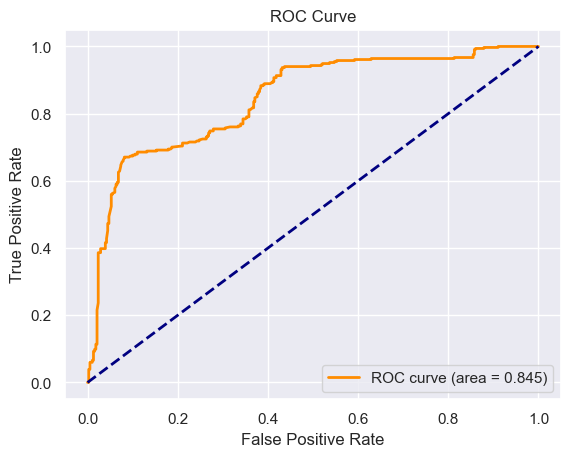

In [39]:
plot_roc(fpr,tpr,auc)

Using my ROC curve, I would choose a threshold that would give a TPR of about .65 and an FPR of about .1. This is because the ROC curve seems to level off around an FPR of 0.1, meaning that my TPR would be about the same even if my FPR increased. That is not ideal, as we would like to keep TPR high and FPR low, since some buyers may really want a house with a cinderblock foundation and would not settle for something different.

In [40]:
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr],
                         'fpr':[fpr]})

In [41]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['Foundation_CBlock'], df_test['Foundation_CBlock_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.957895
   threshold  tpr       fpr
0       0.02  1.0  0.915789
   threshold       tpr       fpr
0       0.03  0.997006  0.905263
   threshold       tpr       fpr
0       0.04  0.994012  0.860526
   threshold       tpr       fpr
0       0.05  0.976048  0.857895
   threshold       tpr   fpr
0       0.06  0.967066  0.85
   threshold       tpr       fpr
0       0.07  0.964072  0.813158
   threshold       tpr       fpr
0       0.08  0.964072  0.726316
   threshold       tpr       fpr
0       0.09  0.958084  0.581579
   threshold       tpr       fpr
0        0.1  0.958084  0.552632
   threshold       tpr       fpr
0       0.11  0.952096  0.547368
   threshold       tpr       fpr
0       0.12  0.949102  0.536842
   threshold       tpr       fpr
0       0.13  0.949102  0.528947
   threshold       tpr       fpr
0       0.14  0.949102  0.521053
   threshold       tpr       fpr
0       0.15  0.943114  0

Using the function above, I was able to find the predictive probability threshold that corresponds closest to an FPR of 0.1 and TPR of 0.65 is about 0.62.

In [42]:
df_test['Foundation_CBlock_classified']=1*(df_test['Foundation_CBlock_test']>0.62)
df_test.head()

,Foundation_CBlock,Foundation_CBlock_test,Foundation_CBlock_classified
655,1,0.278443,0
645,1,0.734680,1
80,0,0.375817,0
1927,1,0.303773,0
2030,0,0.614533,0


In [43]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['Foundation_CBlock'], y_pred=df_test['Foundation_CBlock_classified']).ravel()
(tn, fp, fn, tp)

(341, 39, 108, 226)

In [44]:
sensitivity=tp/(tp+fn)
print('sensitivity (True Positive Rate):', sensitivity)

sensitivity (True Positive Rate): 0.6766467065868264


In [45]:
false_positive_rate=fp/(tn+fp)
print('false positive rate:', false_positive_rate)

false positive rate: 0.10263157894736842


The True Positive Rate and False Positive Rate of my predictive probability threshold when classifying the data are about .6766 and .1026, respectively. 

In my logistic regression analysis, I determined that there is a linear relationship between log-odds of a foundation being Cinderblock and the Year a house was built, its external quality, basement quality, and the basement's exposure. This is because the logistic regression model's AUC was 0.845, which is a high value. This means that the model was a strong fit to the data. Additionally, since all but two slopes had sufficient evidence of being non-zero in the population model, it is likely that the model's fit will be strong on the population as well. Lastly, homebuyers will know that the model will correctly classify an Ames, Iowa home's foundation as Cinderblock about 67% of the time, and can use this when making predictions for homes they are interested in.  

## 6. Conclusion

**Research Findings:**

My goal with this research was to be able to Sale Prices of homes in Ames, Iowa, as well as the features that define these homes. I will describe what I found from each research question below.

**Descriptive Analytics:**

Beginning with my Descriptive Analytics question, I found that the there was a positive relationship between the Year a home was remodeled and its Sale Price, as well as between the Overall Quality rating of a home and its Sale Price. This was shown in the scatterplot, which had the Sale Price of home increase on the y-axis as the Year Remodeled increased on the x-axis. As the Sale Price increased on the y-axis, the shade of color lightened, meaning the Overall Quality rating was increasing as well. Additionally, through the .describe() function's summary tables, the exact numerical values of center (mean & median) demonstrated the same positive relationship for each set of variables. With the increasing price, however, came increased variability in sale price. I calculated this by finding the difference in IQRs for the latest remodel year and earliest remodel year, as well as the highest overall quality rating and lowest overall quality rating. Lastly, to determine how Overall Quality impacted the relationship between Sale Price and Remodel Year, I grouped Overall Quality and Remodel Year together to make a summary table. Within this table, I was able to determine that Overall Quality still had the same positive relationship with Sale Price regardless of the remodel year. Therefore, I determined that the relationship between Remodel Year and Sale Price was impacted by Overall Quality through a compounded in increase in Sale Price, thanks to its separate, independent relationship.

**Inference (Hypothesis Testing) Analysis:**

My goal with this question was to determine if having a central air conditioning system significantly impacted its mean sale price. To determine this, I conducted a hypothesis test on the mean difference of sale price for homes with and without central air conditioning, using a significance level of 0.05. The null hypothesis was that there was no difference in mean sale price. The p-value obtained from this test was ~0.00, which was less than my significance level of 0.05. Therefore, I rejected my null hypothesis because there was sufficient evidence to support the claim that there is a significant difference between mean sale price of Ames, Iowa homes that have central air conditioning and Ames, Iowa homes that do not have central air conditioning.

**Linear Regression Analysis:**

Based on my linear regression analysis, I found that there is a linear relationship between the sale price of a house and the 1st floor square footage, the number of full bathrooms, and the total number of rooms above ground for houses in Ames, Iowa. My R-Squared value, 0.52, demonstrated that a moderately strong 52% of variation in Sale Price can be explained by 1st floor square footage, number of full bathrooms, and total number of rooms above ground. Additionally, since there was sufficient evidence to suggest that all 3 slopes were non-zero for the population, it is likely that the relationship will hold true for all houses sold in Ames, Iowa, not just those from the sample.

**Logistic Regression Analysis:**

In my logistic regression analysis, I determined that there is a linear relationship between log-odds of a foundation being Cinderblock and the Year a house was built, its external quality, basement quality, and the basement's exposure. This is because the logistic regression model's AUC was 0.845, which is a strong value. This means that the model was a strong fit to the data, demonstrating a linear relationship. Additionally, since all but two slopes had sufficient evidence of being non-zero in the population model, it is likely that the model's fit will be strong on the population as well. Lastly, homebuyers will know that the model will correctly classify an Ames, Iowa home's foundation as Cinderblock about 67% of the time, and can use this when making predictions for homes they are interested in.

**Potential Future Work/Research Opportunities:**

Based upon my analysis performed in this report, further questions and research could be performed on the relationship between Sale Price and other potential explanatory variables such as Lot Area, Roof Type, 2nd Floor Square Footage, and more. If realtors and prospective buyers can build a model that incorporates as many non-zero explanatory variables as possible, it is very likely they will be able to determine the fairest price to offer or sell a home for in Ames, Iowa. Additionally, for homebuyers in particular, further analysis could be done on identification of features. If buyers can determine key details about a house, they will have a better idea of what to offer. Or, they could take advantage of seller's offers that don't account for these variables. 